In [1]:
import pypsa
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math
import networkx as nx
import import_ipynb
import cartopy.crs as ccrs

from shapely.geometry import Polygon

In [2]:
# build the network

network = pypsa.Network()

In [3]:
# add buses

vertices = pd.read_csv("database/input_data/substations.csv",
                       index_col = False, usecols =  ['type', 'x', 'y', 'v_nom', 'carrier'])

vertices.rename(columns = {"lon":"x", "lat":"y"}, inplace = True)
vertices.index.name = 'Bus'

In [4]:
vertices

,type,x,y,v_nom,carrier
Bus,,,,,
0,substation,109.2688,1.3429,150,AC
1,substation,108.9876,0.9266,150,AC
2,substation,108.8747,0.8361,150,AC
3,substation,108.8653,0.8300,150,AC
4,substation,108.9853,0.3162,150,AC
...,...,...,...,...,...
59,substation,117.5693,0.4701,150,AC
60,substation,116.6286,3.5114,150,AC
61,substation,116.8411,3.5748,150,AC


In [5]:
pypsa.io.import_components_from_dataframe(network, vertices, "Bus")

In [6]:
network.buses

,type,x,y,v_nom,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,sub_network
Bus,,,,,,,,,,,
0,substation,109.2688,1.3429,150.0,AC,None,1.0,0.0,inf,PQ,
1,substation,108.9876,0.9266,150.0,AC,None,1.0,0.0,inf,PQ,
2,substation,108.8747,0.8361,150.0,AC,None,1.0,0.0,inf,PQ,
3,substation,108.8653,0.8300,150.0,AC,None,1.0,0.0,inf,PQ,
4,substation,108.9853,0.3162,150.0,AC,None,1.0,0.0,inf,PQ,
...,...,...,...,...,...,...,...,...,...,...,...
59,substation,117.5693,0.4701,150.0,AC,None,1.0,0.0,inf,PQ,
60,substation,116.6286,3.5114,150.0,AC,None,1.0,0.0,inf,PQ,
61,substation,116.8411,3.5748,150.0,AC,None,1.0,0.0,inf,PQ,


In [7]:
# add lines

lines1 = pd.read_csv("database/input_data/lines.csv",
                       index_col = False, usecols =  ['bus0', 'bus1', 'v_nom', 'capital_cost', 'length', 'carrier',
                                                      'r', 'x', 'cables', 'wires'])

lines1.index.name = 'Line'

In [8]:
lines1

,bus0,bus1,v_nom,capital_cost,length,carrier,cables,wires,r,x
Line,,,,,,,,,,
0,0,1,150,10,59.200,AC,3,2,0.08,0.32
1,1,3,150,10,20.829,AC,3,2,0.08,0.32
2,3,2,150,10,1.393,AC,3,2,0.08,0.32
3,1,4,150,10,70.613,AC,3,2,0.08,0.32
4,4,5,150,10,42.848,AC,3,2,0.08,0.32
...,...,...,...,...,...,...,...,...,...,...
60,58,59,150,10,42.347,AC,3,2,0.08,0.32
61,60,61,150,10,28.625,AC,3,2,0.08,0.32
62,62,59,150,10,95.892,AC,3,2,0.08,0.32


In [9]:
pypsa.io.import_components_from_dataframe(network, lines1, "Line")

In [10]:
network.lines

,bus0,bus1,v_nom,capital_cost,length,carrier,cables,wires,r,x,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
0,0,1,150,10.0,59.200,AC,3,2,0.08,0.32,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,150,10.0,20.829,AC,3,2,0.08,0.32,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2,150,10.0,1.393,AC,3,2,0.08,0.32,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,4,150,10.0,70.613,AC,3,2,0.08,0.32,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5,150,10.0,42.848,AC,3,2,0.08,0.32,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,58,59,150,10.0,42.347,AC,3,2,0.08,0.32,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,60,61,150,10.0,28.625,AC,3,2,0.08,0.32,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,62,59,150,10.0,95.892,AC,3,2,0.08,0.32,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# add generators

power_plants = pd.read_csv('database/input_data/generators.csv',
                       index_col = False, usecols =  ['bus', 'p_nom', 'carrier', 'efficiency', 'capital_cost',
                                                     'marginal_cost', 'build_year', 'lifetime', 'control'])

power_plants.index.name = 'Generator'

In [12]:
power_plants

,bus,p_nom,carrier,efficiency,capital_cost,marginal_cost,build_year,lifetime,control
Generator,,,,,,,,,
0,24,30.00,Run_of_River,0.33,1.90,0.37,1973,80,PQ
1,10,90.00,Run_of_River,0.33,1.90,0.37,2016,80,PQ
2,14,1.00,Biomass,0.29,2.50,3.00,2014,30,PQ
3,53,2.00,Biomass,0.29,2.50,3.00,2011,30,PQ
4,29,2.40,Biomass,0.29,2.50,3.00,2020,30,PQ
...,...,...,...,...,...,...,...,...,...
394,58,9.13,Coal,0.34,1.65,0.13,2020,40,PQ
395,43,110.00,Coal,0.34,1.65,0.13,2017,40,PQ
396,43,110.00,Coal,0.34,1.65,0.13,2017,40,PQ


In [13]:
pypsa.io.import_components_from_dataframe(network, power_plants, "Generator")

In [14]:
network.generators

,bus,p_nom,carrier,efficiency,capital_cost,marginal_cost,build_year,lifetime,control,type,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
0,24,30.00,Run_of_River,0.33,1.90,0.37,1973,80.0,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
1,10,90.00,Run_of_River,0.33,1.90,0.37,2016,80.0,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
2,14,1.00,Biomass,0.29,2.50,3.00,2014,30.0,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
3,53,2.00,Biomass,0.29,2.50,3.00,2011,30.0,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
4,29,2.40,Biomass,0.29,2.50,3.00,2020,30.0,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,58,9.13,Coal,0.34,1.65,0.13,2020,40.0,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
395,43,110.00,Coal,0.34,1.65,0.13,2017,40.0,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
396,43,110.00,Coal,0.34,1.65,0.13,2017,40.0,PQ,,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


(<matplotlib.collections.PatchCollection at 0x290cbd656d0>,
 <matplotlib.collections.LineCollection at 0x290cbd8cd30>)

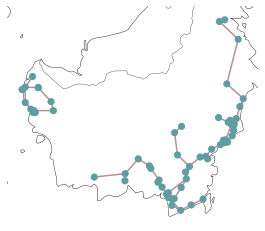

In [15]:
# determine the connected components (again?)

network.determine_network_topology()

network.plot()

In [16]:
# create time index as series

network.set_snapshots(pd.date_range("2021-01-01 00:00:00", "2021-12-31 23:00:00", freq = "H"))

print(network.snapshots)

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2021-12-31 14:00:00', '2021-12-31 15:00:00',
               '2021-12-31 16:00:00', '2021-12-31 17:00:00',
               '2021-12-31 18:00:00', '2021-12-31 19:00:00',
               '2021-12-31 20:00:00', '2021-12-31 21:00:00',
               '2021-12-31 22:00:00', '2021-12-31 23:00:00'],
              dtype='datetime64[ns]', name='snapshot', length=8760, freq='H')


In [19]:
# add loads

demands = pd.read_csv('database/input_data/loads.csv', index_col = False, header = None)

demands.index.name = 'Load'

demands

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
Load,,,,,,,,,,,,,,,,,,,,,
0,164.5761,164.5761,164.5761,164.5761,164.5761,164.5761,164.5761,164.5761,164.5761,164.5761,...,69.8134,69.8134,69.8134,69.8134,69.8134,69.8134,98.9647,98.9647,69.8134,98.9647
1,158.9604,158.9604,158.9604,158.9604,158.9604,158.9604,158.9604,158.9604,158.9604,158.9604,...,67.4312,67.4312,67.4312,67.4312,67.4312,67.4312,95.5877,95.5877,67.4312,95.5877
2,153.7535,153.7535,153.7535,153.7535,153.7535,153.7535,153.7535,153.7535,153.7535,153.7535,...,65.2224,65.2224,65.2224,65.2224,65.2224,65.2224,92.4567,92.4567,65.2224,92.4567
3,148.9194,148.9194,148.9194,148.9194,148.9194,148.9194,148.9194,148.9194,148.9194,148.9194,...,63.1718,63.1718,63.1718,63.1718,63.1718,63.1718,89.5498,89.5498,63.1718,89.5498
4,144.6023,144.6023,144.6023,144.6023,144.6023,144.6023,144.6023,144.6023,144.6023,144.6023,...,61.3405,61.3405,61.3405,61.3405,61.3405,61.3405,86.9538,86.9538,61.3405,86.9538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,177.9601,177.9601,177.9601,177.9601,177.9601,177.9601,177.9601,177.9601,177.9601,177.9601,...,75.4909,75.4909,75.4909,75.4909,75.4909,75.4909,107.0129,107.0129,75.4909,107.0129
8756,181.7480,181.7480,181.7480,181.7480,181.7480,181.7480,181.7480,181.7480,181.7480,181.7480,...,77.0977,77.0977,77.0977,77.0977,77.0977,77.0977,109.2907,109.2907,77.0977,109.2907
8757,177.6354,177.6354,177.6354,177.6354,177.6354,177.6354,177.6354,177.6354,177.6354,177.6354,...,75.3531,75.3531,75.3531,75.3531,75.3531,75.3531,106.8176,106.8176,75.3531,106.8176


In [ ]:
network.madd("Load", ["Load{}"])

In [20]:
network.loads_t

{'p_set': Empty DataFrame
 Columns: []
 Index: [2021-01-01 00:00:00, 2021-01-01 01:00:00, 2021-01-01 02:00:00, 2021-01-01 03:00:00, 2021-01-01 04:00:00, 2021-01-01 05:00:00, 2021-01-01 06:00:00, 2021-01-01 07:00:00, 2021-01-01 08:00:00, 2021-01-01 09:00:00, 2021-01-01 10:00:00, 2021-01-01 11:00:00, 2021-01-01 12:00:00, 2021-01-01 13:00:00, 2021-01-01 14:00:00, 2021-01-01 15:00:00, 2021-01-01 16:00:00, 2021-01-01 17:00:00, 2021-01-01 18:00:00, 2021-01-01 19:00:00, 2021-01-01 20:00:00, 2021-01-01 21:00:00, 2021-01-01 22:00:00, 2021-01-01 23:00:00, 2021-01-02 00:00:00, 2021-01-02 01:00:00, 2021-01-02 02:00:00, 2021-01-02 03:00:00, 2021-01-02 04:00:00, 2021-01-02 05:00:00, 2021-01-02 06:00:00, 2021-01-02 07:00:00, 2021-01-02 08:00:00, 2021-01-02 09:00:00, 2021-01-02 10:00:00, 2021-01-02 11:00:00, 2021-01-02 12:00:00, 2021-01-02 13:00:00, 2021-01-02 14:00:00, 2021-01-02 15:00:00, 2021-01-02 16:00:00, 2021-01-02 17:00:00, 2021-01-02 18:00:00, 2021-01-02 19:00:00, 2021-01-02 20:00:00, 2021-01

In [ ]:
network.buses.iloc[2]